<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# SC12x

## Statistical Analysis

## 개요

여러분은 코스 수료를 마치고 CodeStates에 DS CA (Coaching  Assistant)로 합류했습니다.

여러분에게 주어진 메인 태스크는 세션 및 수강생 핸들링이지만. 

시간을 짜내어 사이드 프로젝트를 하고 싶어졌습니다.

AIB 팀원들과의 커피타임을 통해 수강생 데이터를 하나 받을 수 있었습니다.

> 기수별 학생들 성취도 데이터인데, 어떤 의미가 있는지 확인해주세요.

### Data Description

- F1 : `N`, `D`
- F2 : `Y`, `N`
- F3 : `A`, `B`, `C`, `D` (기수)
- F4 : Continuous
- F5 : Continuous
- F6 : `A` ~ `H`
- F7 : Continuous
- F8 : `X`, `Y`, `Z`
- F9 : `Y`, `N`

## 1. 다음 링크를 참조하여 데이터를 불러오세요. 

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv>

이후 간단한 전처리를 하세요.


In [143]:
import pandas as pd
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv", index_col=0)

print(df.shape)
df.head()

(200, 9)


,F1,F2,F3,F4,F5,F6,F7,F8,F9
1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
2,D,N,A,1.608900,0.133612,H,3.0,X,Y
3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
5,N,N,A,1.532721,0.283534,E,4.0,Z,Y


In [144]:
df.describe()

,F4,F5,F7
count,200.000000,170.000000,197.00000
mean,2.512655,0.500227,4.93401
std,1.166105,0.289515,2.00273
min,0.022079,0.010212,0.00000
25%,1.732794,0.244191,3.00000
50%,2.546567,0.486618,5.00000
75%,3.311934,0.753421,6.00000
max,5.868967,0.993412,11.00000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      200 non-null    object 
 1   F2      191 non-null    object 
 2   F3      200 non-null    object 
 3   F4      200 non-null    float64
 4   F5      170 non-null    float64
 5   F6      200 non-null    object 
 6   F7      197 non-null    float64
 7   F8      200 non-null    object 
 8   F9      200 non-null    object 
dtypes: float64(3), object(6)
memory usage: 15.6+ KB


In [146]:
df.loc[df['F2'].isnull()]

,F1,F2,F3,F4,F5,F6,F7,F8,F9
20,N,NaN,A,1.928164,0.222397,G,6.0,Y,N
54,N,NaN,b,3.311876,0.036056,G,4.0,Z,N
85,N,NaN,B,3.705537,0.036873,H,4.0,X,N
96,N,NaN,b,2.196954,0.373770,G,6.0,X,Y
109,N,NaN,C,3.376163,0.428907,F,5.0,X,Y
140,N,NaN,c,3.773357,0.825418,G,3.0,X,N
143,N,NaN,C,2.472788,0.544661,H,3.0,Z,N
153,N,NaN,D,3.478428,0.412326,G,6.0,Y,N
191,D,NaN,D,2.467199,0.065689,H,8.0,Z,Y


In [147]:
df.loc[df['F5'].isnull()].head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
11,N,N,A,2.004147,NaN,G,7.0,X,N
16,N,N,A,0.792815,NaN,G,6.0,Y,Y
24,N,N,A,0.252420,NaN,D,9.0,Z,N
28,D,N,A,4.155266,NaN,F,7.0,Y,N
47,N,N,a,2.748993,NaN,H,6.0,Z,Y


In [148]:
# F2의 결측치 제거
df = df.loc[~(df['F2'].isnull())]  # ~ = 조건문의 반대 조건
print(df.shape)
df.head()

(191, 9)


,F1,F2,F3,F4,F5,F6,F7,F8,F9
1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
2,D,N,A,1.608900,0.133612,H,3.0,X,Y
3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
5,N,N,A,1.532721,0.283534,E,4.0,Z,Y


In [149]:
# F7의 결측치 제거
df = df.loc[~(df['F7'].isnull())]
print(df.shape)
df.info()

(188, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 1 to 200
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      188 non-null    object 
 1   F2      188 non-null    object 
 2   F3      188 non-null    object 
 3   F4      188 non-null    float64
 4   F5      158 non-null    float64
 5   F6      188 non-null    object 
 6   F7      188 non-null    float64
 7   F8      188 non-null    object 
 8   F9      188 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.7+ KB


In [150]:
# 상이 된 값들이 확인 됩니다
df['F3'].unique()

array(['A', 'a', 'B', 'b', 'C', 'c', 'D', 'd'], dtype=object)

In [151]:
# 전부 대문자로 변형
df['F3'] = df['F3'].str.upper()
df['F3'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [152]:
df['F5'].describe()

count    158.000000
mean       0.509418
std        0.287485
min        0.010212
25%        0.260846
50%        0.495499
75%        0.754274
max        0.992745
Name: F5, dtype: float64

In [153]:
df['F5'] = df['F5'].fillna(df['F5'].mean())
print(df['F5'].isnull().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 1 to 200
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      188 non-null    object 
 1   F2      188 non-null    object 
 2   F3      188 non-null    object 
 3   F4      188 non-null    float64
 4   F5      188 non-null    float64
 5   F6      188 non-null    object 
 6   F7      188 non-null    float64
 7   F8      188 non-null    object 
 8   F9      188 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.7+ KB


## 2. **F3**에 따라서 다른 Feature들이 어떤 경향을 나타내는지 해석해보세요.

- categorical feature의 경우 crosstab을 사용하여 [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)과 chi-square를 시도해 볼 수 있습니다.

- continuous feature의 경우 여러 시각화와 t-test를 할 수 있을 겁니다.

- 이를 바탕으로 **가장 유의미한** 그리고 **가장 무의미한** feature를 찾아보세요.

여기서 여러분들의 목표는 

`F3`에 따라서 다른 feature들이 영향이 있는지 없는지를 알아보는 

**가설검정** 입니다.

따라서 데이터 탐색 및 시각화 작업에 너무 많은 시간을 쏟지 마세요. 이것은 사이드 프로젝트 입니다.

In [154]:
# 범주형 특성의 통계 가설 검정을 위해 chi-square test 진행 (F1, F2, F6, F8, F9 vs. F3)
from scipy.stats import chi2_contingency

# contingency table
display(pd.crosstab(df['F1'], df['F3'], margins = False))

# chi-square 검정
chi2_contingency(pd.crosstab(df['F1'], df['F3'], margins = False)) # p-value = 0.697

F3,A,B,C,D
F1,,,,
D,6,9,10,9
N,42,37,37,38


(1.4377719467233525,
 0.6967051489258402,
 3,
 array([[ 8.68085106,  8.31914894,  8.5       ,  8.5       ],
        [39.31914894, 37.68085106, 38.5       , 38.5       ]]))

In [155]:
display(pd.crosstab(df['F2'], df['F3'], margins = False))
chi2_contingency(pd.crosstab(df['F2'], df['F3'], margins = False)) # p-value = 0.324

F3,A,B,C,D
F2,,,,
N,44,44,42,46
Y,4,2,5,1


(3.472880983750549,
 0.3242964364801447,
 3,
 array([[44.93617021, 43.06382979, 44.        , 44.        ],
        [ 3.06382979,  2.93617021,  3.        ,  3.        ]]))

In [156]:
display(pd.crosstab(df['F6'], df['F3'], margins = False))
chi2_contingency(pd.crosstab(df['F6'], df['F3'], margins = False)) # pvalue = 0.692

F3,A,B,C,D
F6,,,,
B,0,1,0,0
C,1,1,1,2
D,2,2,1,1
E,5,4,5,4
F,8,15,8,5
G,9,9,13,12
H,23,14,19,23


(14.55861640492677,
 0.6920174637926282,
 18,
 array([[ 0.25531915,  0.24468085,  0.25      ,  0.25      ],
        [ 1.27659574,  1.22340426,  1.25      ,  1.25      ],
        [ 1.53191489,  1.46808511,  1.5       ,  1.5       ],
        [ 4.59574468,  4.40425532,  4.5       ,  4.5       ],
        [ 9.19148936,  8.80851064,  9.        ,  9.        ],
        [10.9787234 , 10.5212766 , 10.75      , 10.75      ],
        [20.17021277, 19.32978723, 19.75      , 19.75      ]]))

In [157]:
display(pd.crosstab(df['F8'], df['F3'], margins = False))
chi2_contingency(pd.crosstab(df['F8'], df['F3'], margins = False)) # pvalue = 0.541

F3,A,B,C,D
F8,,,,
X,9,5,13,12
Y,25,27,21,22
Z,14,14,13,13


(5.021174328115594,
 0.5411002323035743,
 6,
 array([[ 9.95744681,  9.54255319,  9.75      ,  9.75      ],
        [24.25531915, 23.24468085, 23.75      , 23.75      ],
        [13.78723404, 13.21276596, 13.5       , 13.5       ]]))

In [158]:
display(pd.crosstab(df['F9'], df['F3'], margins = False))
chi2_contingency(pd.crosstab(df['F9'], df['F3'], margins = False)) # pvalue = 0.904

F3,A,B,C,D
F9,,,,
N,24,25,26,27
Y,24,21,21,20


(0.5646820912389221,
 0.904467812423293,
 3,
 array([[26.04255319, 24.95744681, 25.5       , 25.5       ],
        [21.95744681, 21.04255319, 21.5       , 21.5       ]]))

<AxesSubplot:xlabel='F3', ylabel='F4'>

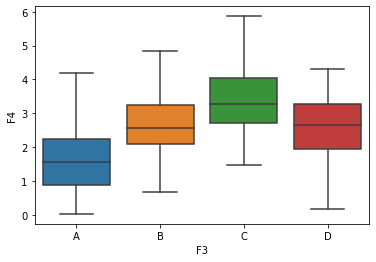

In [159]:
import seaborn as sns

# 시각화를 통해 유의미한 결과를 낼 것 같은 특성을 찾아봅니다
sns.boxplot(x = 'F3', y = 'F4', data = df)

<AxesSubplot:xlabel='F3', ylabel='F5'>

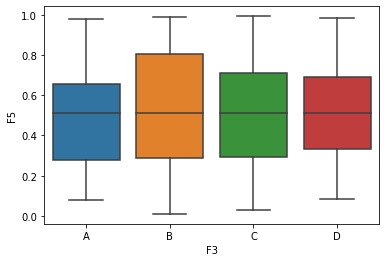

In [160]:
sns.boxplot(x = 'F3', y = 'F5', data = df)

<AxesSubplot:xlabel='F3', ylabel='F7'>

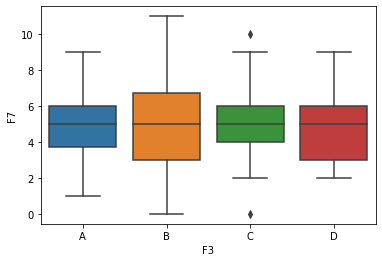

In [161]:
sns.boxplot(x = 'F3', y = 'F7', data = df)

In [162]:
# Label 값으로 df를 나눕니다
df_a = df.loc[df['F3'] == 'A']
df_b = df.loc[df['F3'] == 'B']
df_c = df.loc[df['F3'] == 'C']
df_d = df.loc[df['F3'] == 'D']

In [163]:
import scipy.stats as st

# 2-sample t-test 진행
print(st.ttest_ind(df_a['F7'], df_b['F7']))  # p-value = 0.6286933117456233
print(st.ttest_ind(df_c['F7'], df_d['F7']))  # p-value = 0.956864676261056
print(st.ttest_ind(df_a['F7'], df_d['F7']))  # p-value = 0.8770832353516271
print(st.ttest_ind(df_b['F7'], df_c['F7']))  # p-value = 0.760730797060728

Ttest_indResult(statistic=0.4851923117378722, pvalue=0.6286933117456233)
Ttest_indResult(statistic=-0.05423608234573403, pvalue=0.956864676261056)
Ttest_indResult(statistic=0.15509411900926384, pvalue=0.8770832353516271)
Ttest_indResult(statistic=-0.3054371587024964, pvalue=0.760730797060728)


In [164]:
print(st.ttest_ind(df_a['F4'], df_b['F4']))  # p-value = 2.1881133574189222e-05
print(st.ttest_ind(df_c['F4'], df_d['F4']))  # p-value = 8.589119165482429e-05
print(st.ttest_ind(df_a['F4'], df_d['F4']))  # p-value = 6.685707017447214e-05
print(st.ttest_ind(df_b['F4'], df_c['F4']))  # p-value = 0.00020302751250401738

Ttest_indResult(statistic=-4.474496621650844, pvalue=2.1881133574189222e-05)
Ttest_indResult(statistic=4.109785182276511, pvalue=8.589119165482429e-05)
Ttest_indResult(statistic=-4.175847517751654, pvalue=6.685707017447214e-05)
Ttest_indResult(statistic=-3.8719584390518205, pvalue=0.00020302751250401738)


In [165]:
# ANOVA one-way 테스트
st.f_oneway(df_a['F7'], df_b['F7'], df_c['F7'], df_d['F7']) # p-value = 0.963

F_onewayResult(statistic=0.09320183296491334, pvalue=0.9637173247122047)

In [166]:
st.f_oneway(df_a['F4'], df_b['F4'], df_c['F4'], df_d['F4'])  # p-value = 6.945888240859205e-13

F_onewayResult(statistic=23.417314372781295, pvalue=6.945888240859205e-13)

In [167]:
st.f_oneway(df_a['F5'], df_b['F5'], df_c['F5'], df_d['F5'])  # p-value = 0.891

F_onewayResult(statistic=0.20768495826981972, pvalue=0.890988707081584)

## 3.분석한 내용들을 설명하는 리포트를 작성해보세요.

분석의 끝은 결국 설명입니다.

통계 분석에 대한 이해도가 적은 다른 크루들이 이해 할 수 있도록 

분석한 내용들을 설명하는 리포트를 작성해보세요. 

필요한 경우 코드 / 텍스트 내용을 더 추가해도 좋습니다.

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하고, 시간이 남았다면 아래 내용을 충족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들 중 하나의 요구사항만 충족하면 되며, 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- Numerical 데이터에 대해서 normalize를 한 다음, 위에서 진행 했었던 분석을 다시 시행해보세요. (F4, F5, F7 vs F3)

- Categorical 데이터를 one-hot encoding을 통해서 numerical 로 변환 후, 위에서 진행 했었던 분석을 다시 시행해보세요. (F1, F2, F6, F8, F9 vs F3)

In [168]:
# Normalization의 방법 중 하나인 StandardScaler를 사용합니다 https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

sc.fit_transform(df[['F4','F5','F7']])

df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
2,D,N,A,1.608900,0.133612,H,3.0,X,Y
3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
5,N,N,A,1.532721,0.283534,E,4.0,Z,Y


In [171]:
numerical = ['F4', 'F5', 'F7']
x = df[numerical].values
x_scaled = sc.fit_transform(x)

df_temp = pd.DataFrame(x_scaled, columns=numerical, index = df.index)
df[numerical] = df_temp

In [172]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9
1,N,N,A,-0.236640,1.005994,H,-0.957750,Y,Y
2,D,N,A,-0.776682,-1.430464,H,-0.957750,X,Y
3,N,N,A,0.024430,0.808689,H,1.522374,Y,Y
4,N,Y,A,-1.484053,-0.950332,F,2.018399,Y,N
5,N,N,A,-0.841917,-0.859805,E,-0.461725,Z,Y
...,...,...,...,...,...,...,...,...,...
196,N,N,D,0.213609,0.930271,G,0.034300,X,Y
197,N,Y,D,0.498917,0.486182,G,-1.453775,Y,Y
198,N,N,D,-0.772434,1.421357,F,-1.453775,Z,Y
199,N,N,D,0.417814,1.459181,G,-0.461725,Z,Y


In [173]:
df_a = df.loc[df['F3'] == 'A']
df_b = df.loc[df['F3'] == 'B']
df_c = df.loc[df['F3'] == 'C']
df_d = df.loc[df['F3'] == 'D']

In [174]:
# ANOVA one-way 테스트
st.f_oneway(df_a['F7'], df_b['F7'], df_c['F7'], df_d['F7']) # p-value = 0.963

F_onewayResult(statistic=0.09320183296491345, pvalue=0.9637173247122047)

In [175]:
st.f_oneway(df_a['F4'], df_b['F4'], df_c['F4'], df_d['F4'])  # p-value = 6.945888240859205e-13

F_onewayResult(statistic=23.41731437278129, pvalue=6.945888240859205e-13)

In [176]:
st.f_oneway(df_a['F5'], df_b['F5'], df_c['F5'], df_d['F5'])  # p-value = 0.891

F_onewayResult(statistic=0.2076849582698197, pvalue=0.890988707081584)

In [ ]:
# Normalization을 해도 결과값에는 차이가 없음

In [185]:
# 범주형 특성들을 One-Hot Encoding 합니다. https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
df_cat = pd.get_dummies(df[['F1', 'F2', 'F6', 'F8', 'F9']])
df_cat['F3'] = df['F3']
df_cat.head()

,F1_D,F1_N,F2_N,F2_Y,F6_B,F6_C,F6_D,F6_E,F6_F,F6_G,F6_H,F8_X,F8_Y,F8_Z,F9_N,F9_Y,F3
1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,A
2,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,A
3,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,A
4,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,A
5,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,A


In [193]:
# Chisquare 진행 https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43
chi2_contingency(pd.crosstab(df_cat['F1_D'], df_cat['F3'], margins = False))

(1.4377719467233525,
 0.6967051489258402,
 3,
 array([[39.31914894, 37.68085106, 38.5       , 38.5       ],
        [ 8.68085106,  8.31914894,  8.5       ,  8.5       ]]))

In [195]:
chi2_contingency(pd.crosstab(df_cat['F2_Y'], df_cat['F3'], margins = False))

(3.472880983750549,
 0.3242964364801447,
 3,
 array([[44.93617021, 43.06382979, 44.        , 44.        ],
        [ 3.06382979,  2.93617021,  3.        ,  3.        ]]))

In [197]:
# One-Hot Encoding을 한 특성들에 대해 F3와 Chi-square를 진행해도 결과값은 같음